In [101]:
#importing libaries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1. Load the data :

    * Read the “housing.csv” file from the folder into the program.
    * Print first few rows of this data.
    * Extract input (X) and output (Y) data from the dataset.

In [102]:
data = pd.read_csv('1553768847_housing.csv')

In [103]:
data.shape

(20640, 10)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [105]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [106]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

* y = ['mdeian_house_value']
* X = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','ocean_proximity']

2. Handle missing values :

    * Fill the missing values with the mean of the respective column.


In [109]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [110]:
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

# EDA

In [111]:
#checking correlation
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


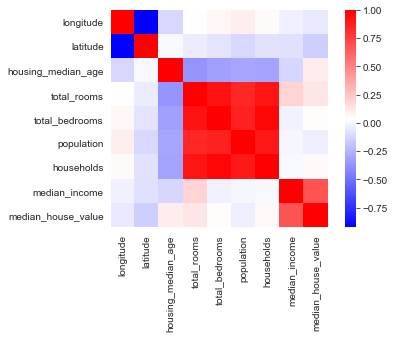

In [112]:
sns.heatmap(data.corr(),square=True,cmap='bwr')

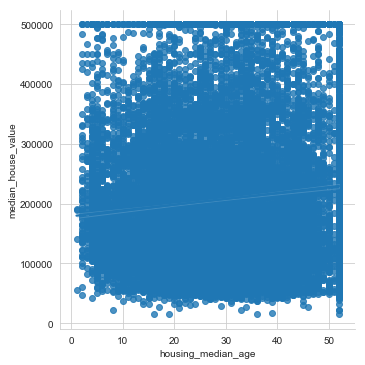

In [113]:
sns.lmplot(x ='housing_median_age', y ='median_house_value', data = data)

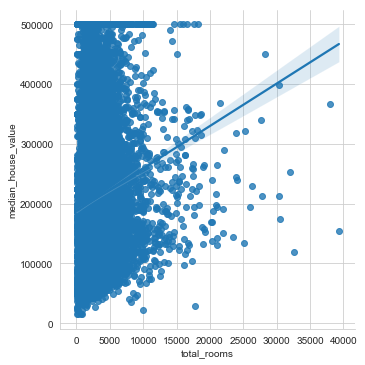

In [114]:
sns.lmplot(x ='total_rooms', y ='median_house_value', data = data)

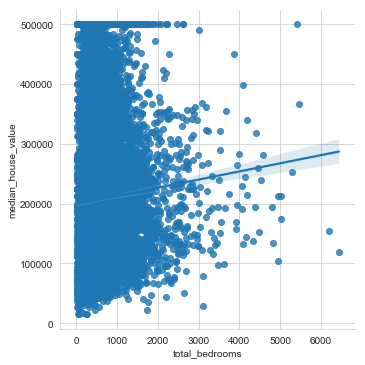

In [115]:
sns.lmplot(x ='total_bedrooms', y ='median_house_value', data = data)
#sns.scatterplot(data=data,x=data['total_bedrooms'], y=data['median_house_value'])

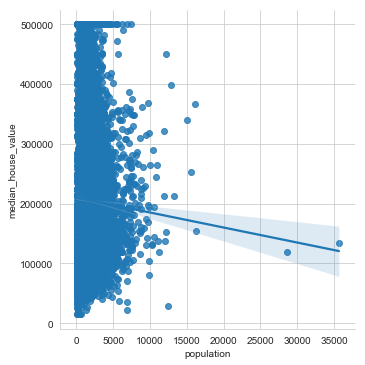

In [116]:
sns.lmplot(x ='population', y ='median_house_value', data = data)
#sns.scatterplot(data=data,x=data['population'], y=data['median_house_value'])

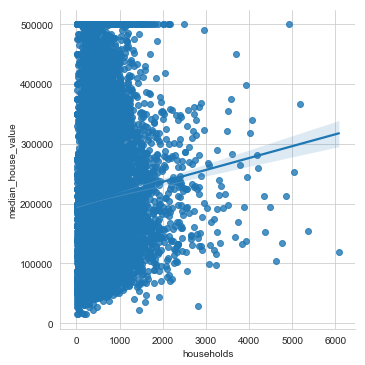

In [117]:
sns.lmplot(x ='households', y ='median_house_value', data = data)
#sns.scatterplot(data=data,x=data['households'], y=data['median_house_value'])

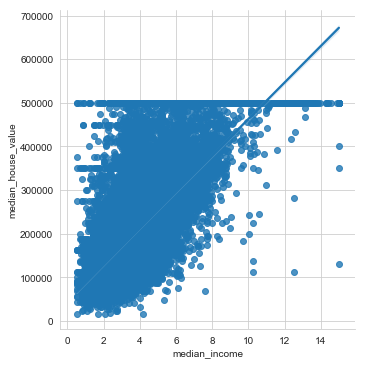

In [118]:
sns.lmplot(x ='median_income', y ='median_house_value', data = data)
#sns.scatterplot(data=data,x=data['median_income'], y=data['median_house_value'])

In [119]:
# froom the plots, it is observed that only median_income has high postive correlation comapred to others
# population shows a negative correlation but does not have considerable signficance 
# oter fetaures are some what corelated but not much significant

In [120]:
#Checking the categorical variable
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

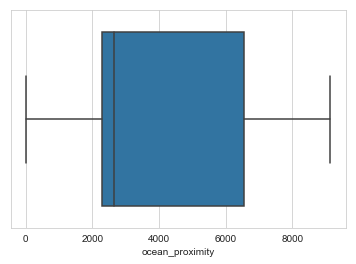

In [121]:
sns.boxplot(data['ocean_proximity'].value_counts())

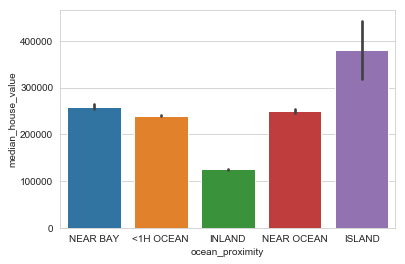

In [122]:
sns.barplot(data=data, x= data['ocean_proximity'], y=data['median_house_value'])

In [123]:
# we see that the median_house_vlue in Island apperas to be the most compared Inland.
# median_house_vlue for Near BAY, <1H Ocean and Near Ocean, are mostly similar

In [124]:
# checking Outliers

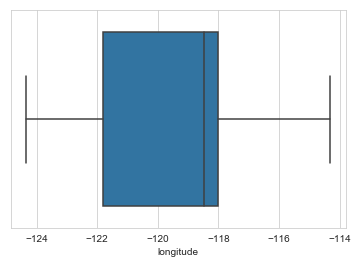

In [125]:
sns.boxplot(data['longitude'])

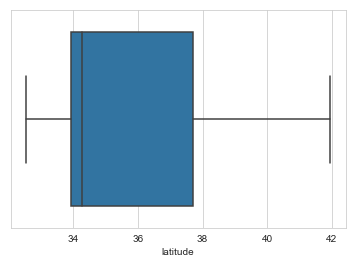

In [126]:
sns.boxplot(data['latitude'])

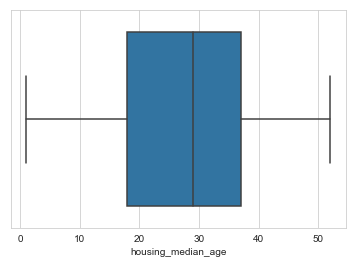

In [127]:
sns.boxplot(data['housing_median_age'])

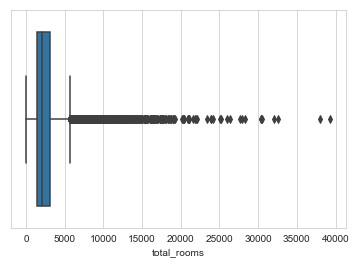

In [128]:
sns.boxplot(data['total_rooms'])

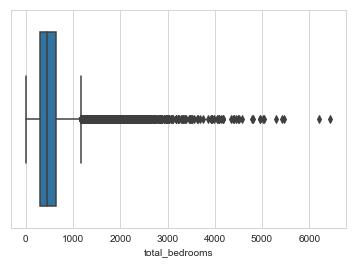

In [129]:
sns.boxplot(data['total_bedrooms'])

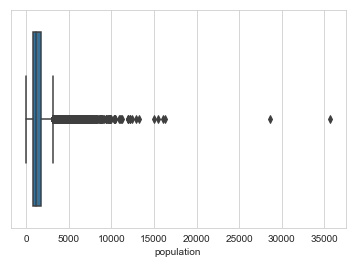

In [130]:
sns.boxplot(data['population'])

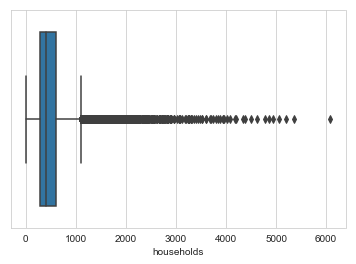

In [131]:
sns.boxplot(data['households'])

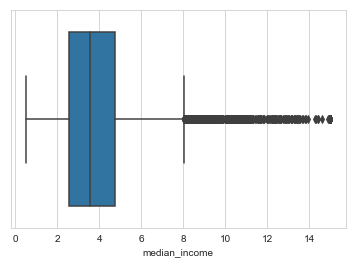

In [132]:
sns.boxplot(data['median_income'])

In [133]:
# We see lots of outliers in total_rooms, total_bedrooms, populations, households, median_income

In [134]:
#handling outliers
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [135]:
#Outlier Treatment

def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

In [136]:
df= outlier_detect(data)

In [137]:
df.shape

(20640, 10)

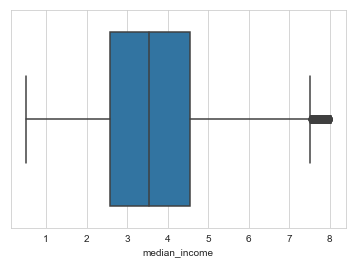

In [138]:
sns.boxplot(df['median_income'])

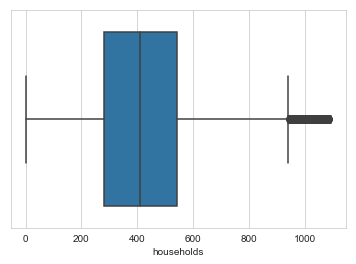

In [139]:
sns.boxplot(df['households'])

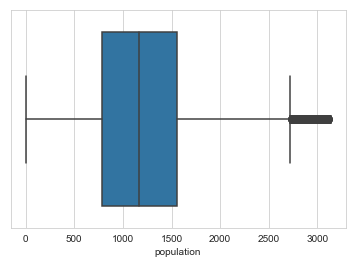

In [140]:
sns.boxplot(df['population'])

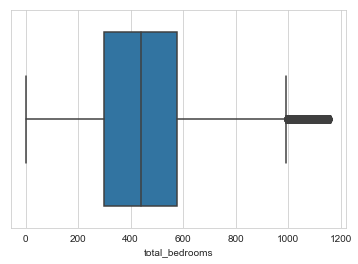

In [141]:
sns.boxplot(df['total_bedrooms'])

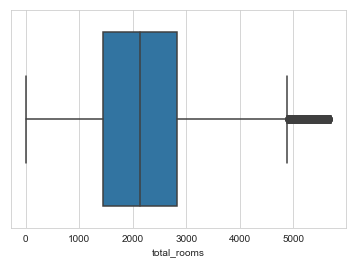

In [142]:
sns.boxplot(df['total_rooms'])

3. Encode categorical data :

    *Convert categorical column in the dataset to numerical data.

In [143]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [144]:
df =pd.get_dummies(columns=['ocean_proximity'], drop_first=True,data=df)

In [145]:
df.shape

(20640, 13)

In [146]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880.0,129.0,322.0,126.0,3.5348,452600.0,0,0,1,0
1,-122.22,37.86,21,2127.0,1106.0,2401.0,409.0,3.5348,358500.0,0,0,1,0
2,-122.24,37.85,52,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


4. Split the dataset : 

    *Split the data into 80% training dataset and 20% test dataset.


In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [160]:
print(X.shape)
print(y.shape)

(20640, 12)
(20640,)


In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size=0.8, random_state=1)

In [162]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16512, 12)
(16512,)
(4128, 12)
(4128,)


In [163]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15961,-122.43,37.71,52,1410.0,286.0,879.0,282.0,3.1908,0,0,1,0
1771,-122.35,37.95,42,1485.0,290.0,971.0,303.0,3.6094,0,0,1,0
16414,-121.24,37.90,16,50.0,10.0,20.0,6.0,2.6250,1,0,0,0
5056,-118.35,34.02,34,5218.0,438.0,1166.0,409.0,1.5143,0,0,0,0
8589,-118.39,33.89,38,1851.0,332.0,750.0,314.0,7.3356,0,0,0,0


In [164]:
from sklearn.preprocessing import StandardScaler

In [165]:
scaler = StandardScaler()

In [166]:
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.fit_transform(X_test)

In [167]:
X_train_Scaled

array([[-1.42250942,  0.97229046,  1.85890297, ..., -0.01740407,
         2.82640555, -0.38546202],
       [-1.38265919,  1.08459626,  1.06434823, ..., -0.01740407,
         2.82640555, -0.38546202],
       [-0.8297373 ,  1.06119922, -1.0014941 , ..., -0.01740407,
        -0.35380627, -0.38546202],
       ...,
       [ 0.65468363, -0.79652586,  1.06434823, ..., -0.01740407,
        -0.35380627, -0.38546202],
       [ 1.20262424, -0.89011402, -1.47822694, ..., -0.01740407,
        -0.35380627, -0.38546202],
       [-1.30794002,  1.00972573,  0.50815991, ..., -0.01740407,
         2.82640555, -0.38546202]])

In [168]:
X_test_Scaled

array([[ 0.59953305, -0.73685251,  0.81226638, ...,  0.        ,
        -0.35109159, -0.38047173],
       [-0.11505424,  0.53929953,  0.65331708, ...,  0.        ,
        -0.35109159, -0.38047173],
       [-1.44358273,  0.9850144 ,  1.36858896, ...,  0.        ,
         2.84825961, -0.38047173],
       ...,
       [-1.4184212 ,  0.92402184, -0.22090411, ...,  0.        ,
        -0.35109159,  2.62831619],
       [ 0.73037298, -0.72277731,  1.05069034, ...,  0.        ,
        -0.35109159, -0.38047173],
       [ 1.09269893, -0.76969466,  1.84543688, ...,  0.        ,
        -0.35109159, -0.38047173]])

6. Perform Linear Regression : 

    *Perform Linear Regression on training data.
    *Predict output for test dataset using the fitted model.
    *Print root mean squared error (RMSE) from Linear Regression.

            *[ HINT: Import mean_squared_error from sklearn.metrics ]

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [170]:
lr_model = LinearRegression()

In [171]:
lr_model.fit(X_train_Scaled, y_train)

LinearRegression()

In [172]:
lr_y_pred = lr_model.predict(X_test_Scaled)

In [173]:
print(r2_score(lr_y_pred, y_test))
print(mean_squared_error(lr_y_pred, y_test))
print(np.sqrt(mean_squared_error(lr_y_pred, y_test)))

0.053521915604262005
4086519451.894856
63925.89030975522


In [174]:
lr_y_pred

array([223356.17917713,  96622.66600733, 232986.95384385, ...,
       260470.69785784, 243171.70269325, 123779.93032936])

7. Perform Decision Tree Regression :

    * Perform Decision Tree Regression on training data.
    * Predict output for test dataset using the fitted model.
    * Print root mean squared error from Decision Tree Regression.


In [175]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_Scaled, y_train)

DecisionTreeClassifier()

In [176]:
y_predict = classifier.predict(X_test_Scaled)

In [177]:
print(r2_score(y_predict, y_test))
print(mean_squared_error(y_predict, y_test))
print(np.sqrt(mean_squared_error(y_predict, y_test)))

0.2474256223270186
6625238499.273741
81395.56805670528


In [178]:
y_predict

array([287500.,  58800., 361000., ..., 375000., 150300.,  82200.])

8. Perform Random Forest Regression :

    * Perform Random Forest Regression on training data.
    * Predict output for test dataset using the fitted model.
    * Print RMSE (root mean squared error) from Random Forest Regression.


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size=0.8, random_state=1)

In [186]:
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.fit_transform(X_test)

In [187]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier_scaled = RandomForestClassifier(30)
RF_classifier_scaled.fit(X_train_Scaled, y_train)

MemoryError: could not allocate 237240320 bytes

In [ ]:
rf_y_predict = RF_classifier_scaled.predict(X_test_Scaled)

9. Bonus exercise: Perform Linear Regression with one independent variable :

    * Extract just the median_income column from the independent variables (from X_train and X_test).
    * Perform Linear Regression to predict housing values based on median_income.
    * Predict output for test dataset using the fitted model.
    * Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.


In [63]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
6872,-118.09,34.07,38,1036,226.0,1058,235,3.2578,0,0,0,0
7462,-118.18,33.93,35,952,271.0,949,261,2.4297,0,0,0,0
12342,-116.53,33.84,28,8399,1839.0,3470,1340,2.5885,1,0,0,0
16149,-122.47,37.77,52,3143,635.0,1350,623,3.8571,0,0,1,0
14757,-117.04,32.55,15,2206,648.0,2511,648,1.6348,0,0,0,1


In [70]:
X_Train = X_train[['median_income']]
X_Test = X_test[['median_income']]

In [72]:
lr_model.fit(X_Train, y_train)

LinearRegression()

In [73]:
y_pred = lr_model.predict(X_Test)

In [74]:
print(r2_score(y_pred, y_test))
print(mean_squared_error(y_pred, y_test))
print(np.sqrt(mean_squared_error(y_pred, y_test)))

-0.06242357782787589
7000427444.342251
83668.55708294634
